In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###Tasks To Do

####3.1 Problem - 1: Getting Started with Data Exploration - Some Warm up Exercises:

#####Data Exploration and Understanding

In [3]:
#Loading the dataset
dt = pd.read_csv("/content/drive/MyDrive/WHR-2024-5CS037.csv")

#Printing the first then rows
print("First ten rows of the dataset:")
print(dt.head(10))
print()

#Rows and Columns of Dataset
rows,columns = dt.shape
print("\nNumber of rows in the dataset:",rows)
print("Number of columns in the dataset:",columns)
print()

#Columns and their datatypes
print("Columns and their datatypes:")
print(dt.dtypes)

First ten rows of the dataset:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3        

In [4]:
score = dt[['score']]
#Mean
mean_score = score.mean()
print("Mean Score:",mean_score)

#Median
median_score = score.median()
print("Median Score:",median_score)

#Standard Deviation
std_score = score.std()
print("Standard Deviation of Score:",std_score)

# Identify the country with the highest happiness score
max_score = dt['score'].max()
country_highest_score = dt[dt['score'] == max_score]['Country name'].values[0]
print(f"Country with the highest happiness score ({max_score}): {country_highest_score}")

# Identify the country with the lowest happiness score
min_score = dt['score'].min()
country_lowest_score = dt[dt['score'] == min_score]['Country name'].values[0]
print(f"Country with the lowest happiness score ({min_score}): {country_lowest_score}")

Mean Score: score    5.52758
dtype: float64
Median Score: score    5.785
dtype: float64
Standard Deviation of Score: score    1.170717
dtype: float64
Country with the highest happiness score (7.741): Finland
Country with the lowest happiness score (1.721): Afghanistan


In [5]:
# Check for missing values in the dataset
missing_values = dt.isnull().sum()

# Display the total count of missing values for each column
print("Missing values in each column:")
if missing_values.any():  # Check if there are any missing values
    print(missing_values[missing_values > 0])  # Display only columns with missing values
else:
    print("No missing values in the dataset.")

Missing values in each column:
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [6]:
#Filtering the dataset where score is greater than 7.5
filtered_data = dt[dt['score'] > 7.5]
#Sorting the filtered data according to GDP per capita
filtered_data_srt = filtered_data.sort_values(by = 'Log GDP per capita',ascending = False)
print("Filtered Data:")
print(filtered_data_srt.head(10))

Filtered Data:
  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


In [7]:
def categorize_happiness(score):
  """
    Categorizes a happiness score into three levels: Low, Medium, or High.

    Parameters:
        score (int or float): A numeric score representing the level of happiness.

    Returns:
        str: A string indicating the happiness category:
             - "Low" for scores less than 4
             - "Medium" for scores between 4 and 6 (inclusive)
             - "High" for scores greater than 6
  """
  if score < 4:
    return "Low"
  elif 4<= score <=6:
    return "Medium"
  else:
    return "High"

dt['Happiness Category'] = dt['score'].apply(categorize_happiness)
print(dt.head(10))

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                    0.724              

#####Data Visualizations

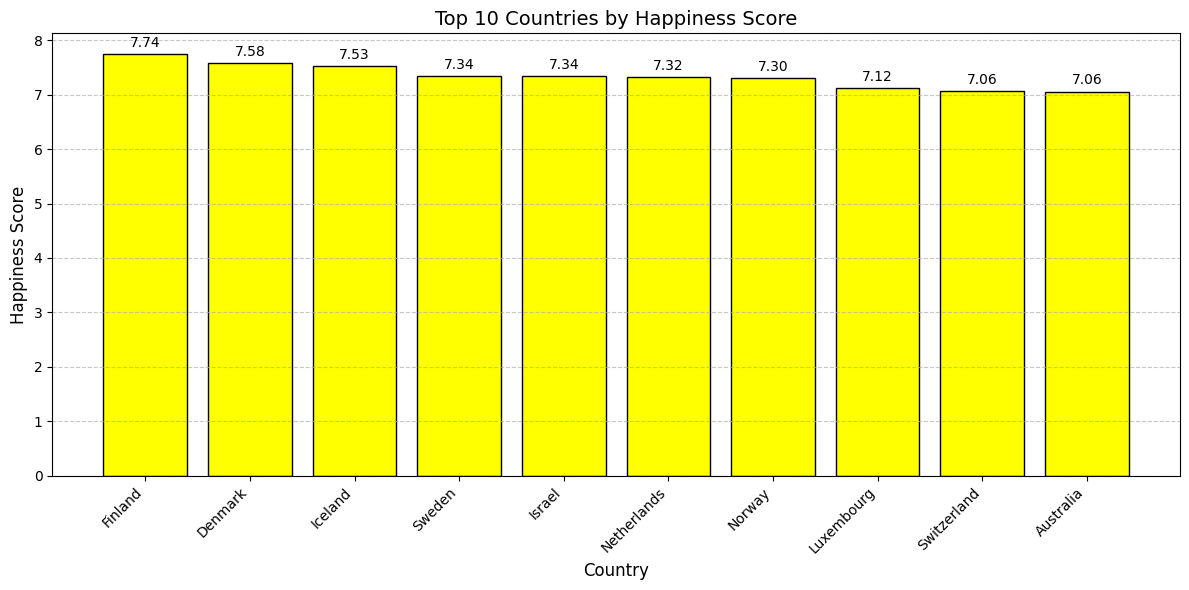

In [8]:
top10_happiness = dt.nlargest(10, 'score')

plt.figure(figsize=(12, 6))
bars = plt.bar(top10_happiness['Country name'], top10_happiness['score'], color='yellow', edgecolor='black')

plt.xlabel('Country', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.title('Top 10 Countries by Happiness Score', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.bar_label(bars, fmt='%.2f', padding=3, fontsize=10)
plt.tight_layout()
plt.show()

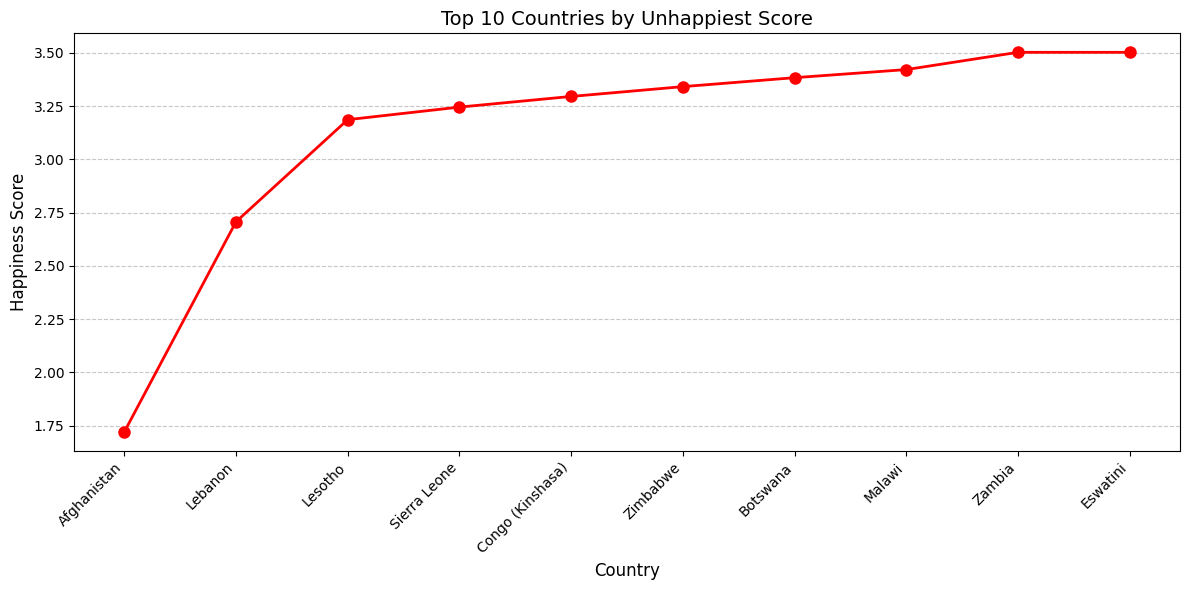

In [9]:
top10_unhappiest = dt.nsmallest(10, 'score')

plt.figure(figsize=(12, 6))
plt.plot(top10_unhappiest['Country name'], top10_unhappiest['score'], color='red', marker='o', linestyle='-', linewidth=2, markersize=8)

plt.xlabel('Country', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.title('Top 10 Countries by Unhappiest Score', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

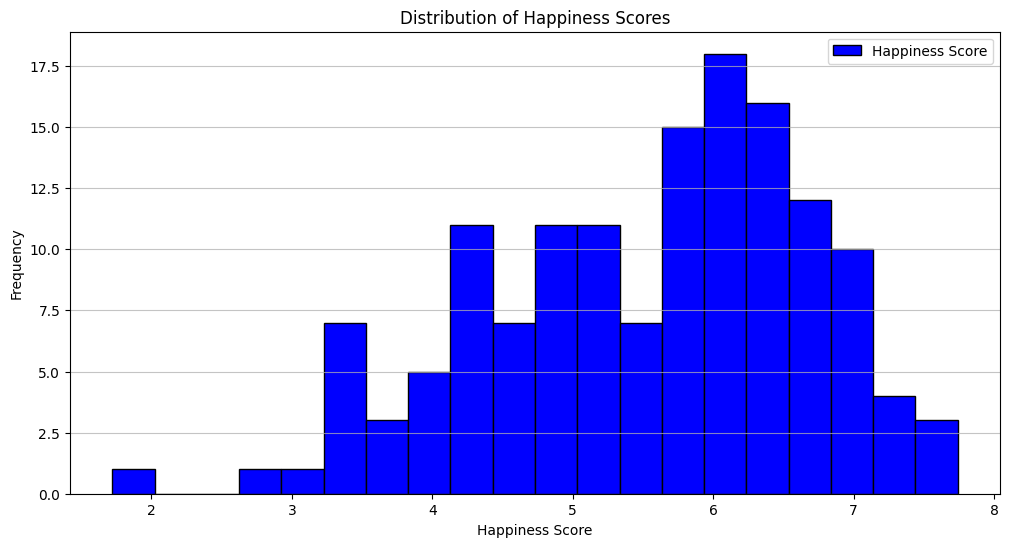

In [10]:
#Histogram for score column to show its distribution
plt.figure(figsize=(12, 6))
plt.hist(dt['score'], bins=20, color='blue', edgecolor='black', label='Happiness Score')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.title('Distribution of Happiness Scores')
plt.grid(axis='y', alpha=0.75)
plt.legend(loc='upper right')
plt.show()

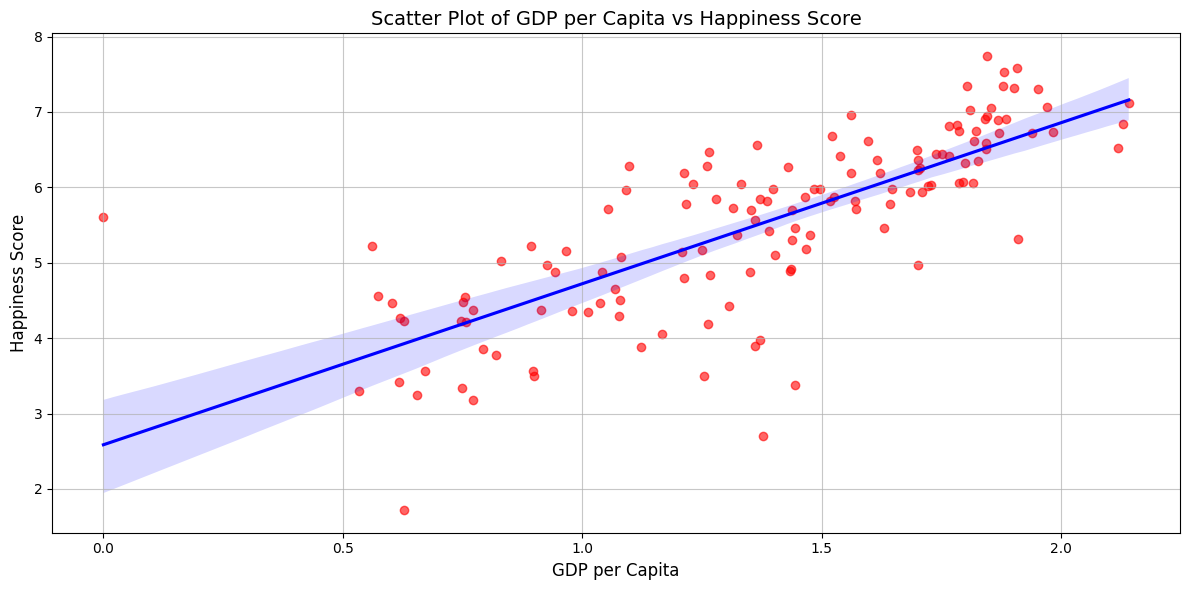

In [11]:
# Scatter plot with regression line
plt.figure(figsize=(12, 6))

# Plot scatter points and regression line
sns.regplot(x=dt['Log GDP per capita'],
            y=dt['score'],
            scatter_kws={'color': 'red', 'alpha': 0.6},
            line_kws={'color': 'blue'})

# Add labels and title
plt.xlabel('GDP per Capita', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.title('Scatter Plot of GDP per Capita vs Happiness Score', fontsize=14)

# Grid for better readability
plt.grid(alpha=0.7)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

###3.2 Problem - 2 - Some Advance Data Exploration Task:

#####Task - 1 - Setup Task - Preparing the South-Asia Dataset:

In [12]:
#Defining south-asian countries
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India","Maldives", "Nepal", "Pakistan", "Sri Lanka"]

#Filtering the south-asian countries in dataset
south_asian_dt = dt[dt['Country name'].isin(south_asian_countries)]
south_asian_dt.to_csv("/content/drive/MyDrive/South_Asia_Happiness_Report.csv",index = False)

#Printing the filtered dataset
print("Filtered Dataset:")
print(south_asian_dt.head(10))


Filtered Dataset:
    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of c

In [13]:
print(south_asian_dt.columns)

Index(['Country name', 'score', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual',
       'Happiness Category'],
      dtype='object')


#####Task - 2 - Composite Score Ranking:

Sorted Dataset:
  Country name  score  Log GDP per capita  Social support  \
3    Sri Lanka  3.898               1.361           1.179   
0        Nepal  5.158               0.965           0.990   
2        India  4.054               1.166           0.653   
1     Pakistan  4.657               1.069           0.600   
4   Bangladesh  3.886               1.122           0.249   
5  Afghanistan  1.721               0.628           0.000   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
3                    0.586                         0.583       0.144   
0                    0.443                         0.653       0.209   
2                    0.417                         0.767       0.174   
1                    0.321                         0.542       0.144   
4                    0.513                         0.775       0.140   
5                    0.242                         0.000       0.091   

   Perceptions of corruption  Dystopia + residual H

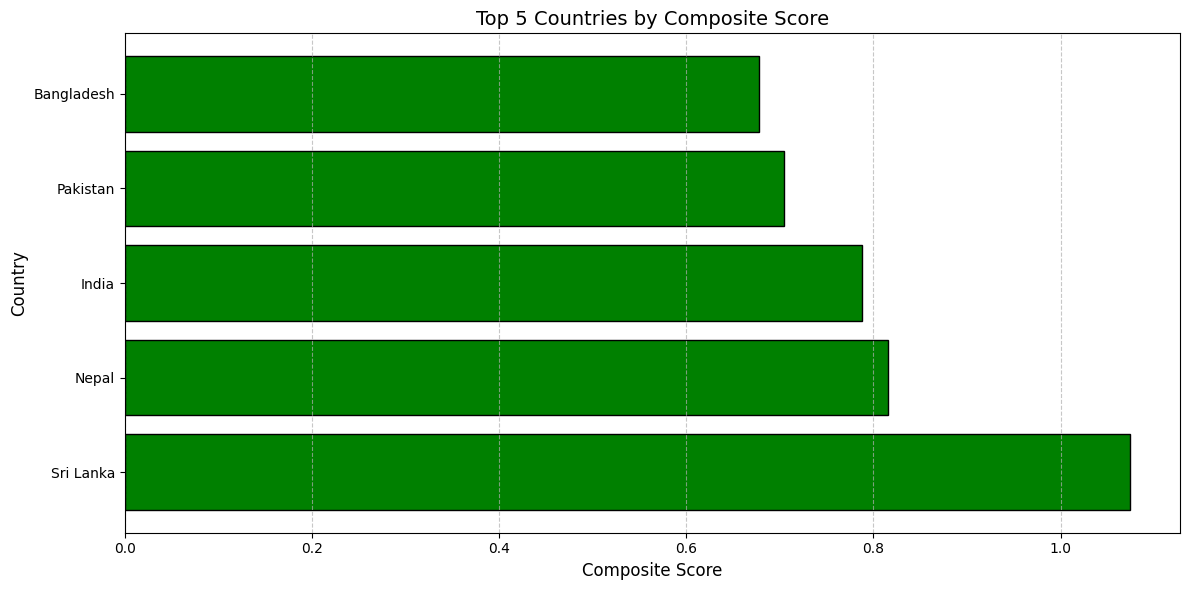

In [14]:
south_asian_dt = pd.read_csv("/content/drive/MyDrive/South_Asia_Happiness_Report.csv")

#Creating new column 'Composite Score'
south_asian_dt['Composite Score'] = ((0.40 * south_asian_dt['Log GDP per capita'])
+ (0.30 * south_asian_dt['Social support']) + (0.30 * south_asian_dt['Healthy life expectancy']))

#Sorting in descending order by Composite Score
sorted_dt = south_asian_dt.sort_values(by = 'Composite Score',ascending = False)
print("Sorted Dataset:")
print(sorted_dt.head(10))

#Horizontal bar chart representing top 5 countries with composite score
top5_countries = south_asian_dt.nlargest(5, 'Composite Score')
plt.figure(figsize=(12, 6))
bars = plt.barh(top5_countries['Country name'], top5_countries['Composite Score'], color='green', edgecolor='black')

plt.xlabel('Composite Score', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Top 5 Countries by Composite Score', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Top 5 Countries by Composite Score:
  Country name  Composite Score
3    Sri Lanka           1.0739
0        Nepal           0.8159
2        India           0.7874
1     Pakistan           0.7039
4   Bangladesh           0.6774

Top 5 Countries by Original Score:
  Country name  score
0        Nepal  5.158
1     Pakistan  4.657
2        India  4.054
3    Sri Lanka  3.898
4   Bangladesh  3.886


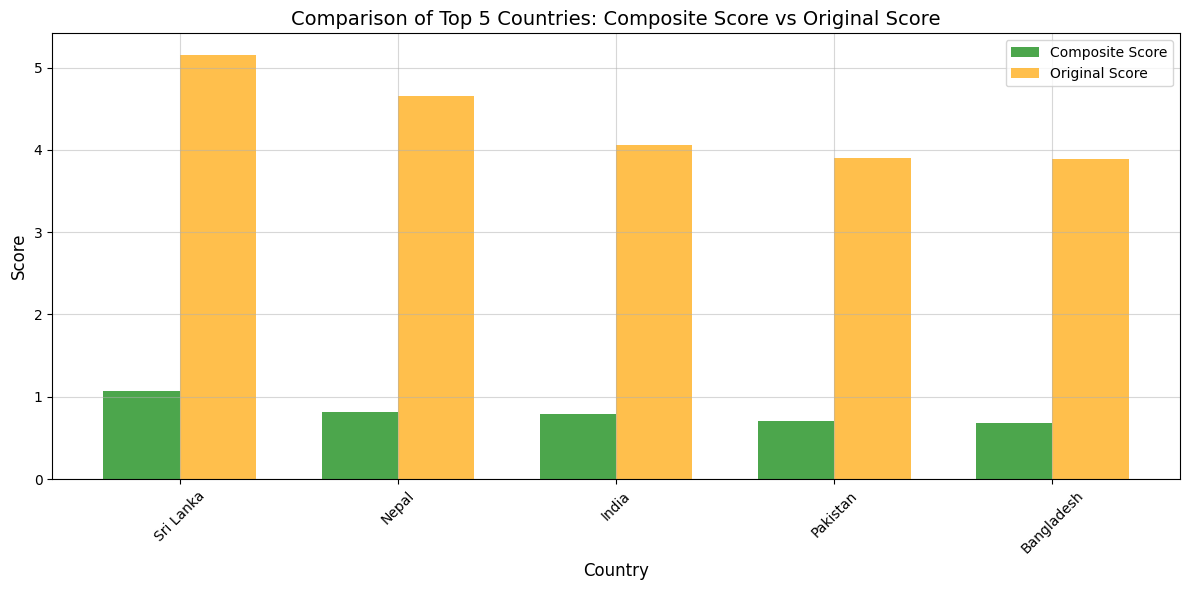

In [15]:
# Compare rankings: Top 5 by Composite Score vs Original Score
top5_composite = south_asian_dt.nlargest(5, 'Composite Score')[['Country name', 'Composite Score']]
top5_original = south_asian_dt.nlargest(5, 'score')[['Country name', 'score']]

print("Top 5 Countries by Composite Score:")
print(top5_composite)
print("\nTop 5 Countries by Original Score:")
print(top5_original)

# Visualization: Comparison between Composite Score and Original Score
plt.figure(figsize=(12, 6))

# Create positions for the bars
x = np.arange(len(top5_composite['Country name']))  # Position of each country
width = 0.35  # Width of the bars

# Plot bars side by side
plt.bar(x - width/2, top5_composite['Composite Score'], width=width, color='green', label='Composite Score', alpha=0.7)
plt.bar(x + width/2, top5_original['score'], width=width, color='orange', label='Original Score', alpha=0.7)

# Customize x-axis with country names
plt.xticks(x, top5_composite['Country name'], rotation=45)

# Add labels, title, and grid
plt.xlabel('Country', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Comparison of Top 5 Countries: Composite Score vs Original Score', fontsize=14)
plt.legend()
plt.grid(alpha=0.5)

# Show plot
plt.tight_layout()
plt.show()


######This bar plot represents the composite score vs the score of the South Asian countries. The x-axis represents the countries, and the y-axis represents the scores in scale. The green bar represents the composite score, and the orange bar represents the original score. By observing the plot, we can see that the original score is comparatively higher than the composite score. The difference between the two scores is uniform.



#####Task - 3 - Outlier Detection:

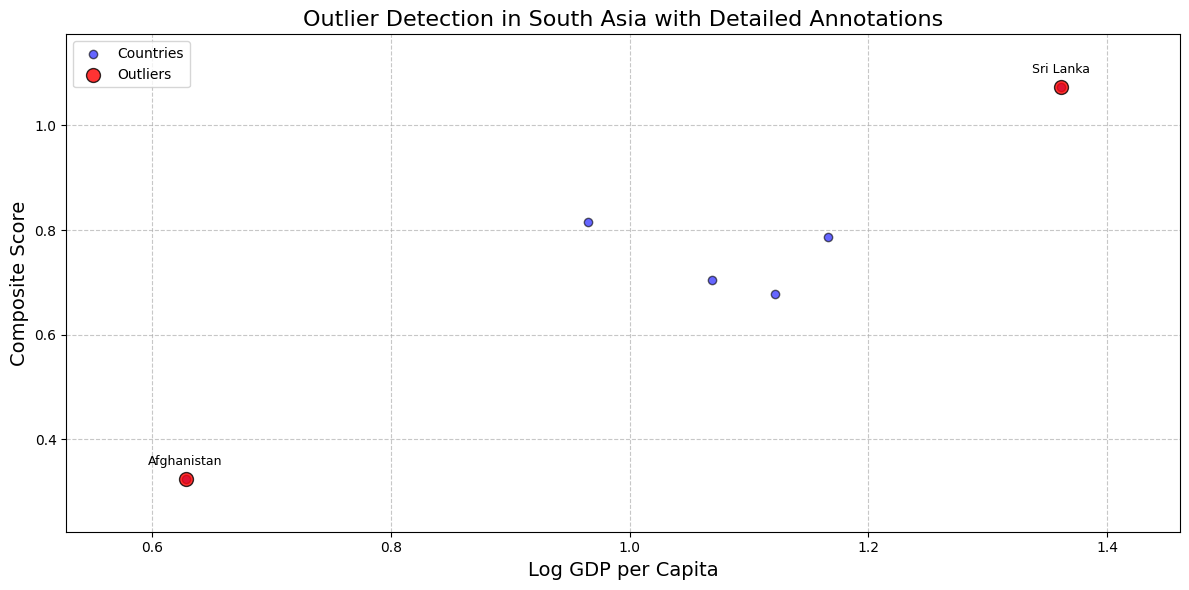

In [16]:
# Calculate Q1, Q3, and IQR for Composite Score and GDP per Capita
def calculate_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    return Q1, Q3, IQR

# Calculate IQR for Composite Score
Q1_score, Q3_score, IQR_score = calculate_iqr(south_asian_dt, 'Composite Score')

# Calculate IQR for GDP per Capita
Q1_gdp, Q3_gdp, IQR_gdp = calculate_iqr(south_asian_dt, 'Log GDP per capita')

# Define outlier bounds
lower_bound_score = Q1_score - 1.5 * IQR_score
upper_bound_score = Q3_score + 1.5 * IQR_score

lower_bound_gdp = Q1_gdp - 1.5 * IQR_gdp
upper_bound_gdp = Q3_gdp + 1.5 * IQR_gdp

# Identify outliers
outliers = south_asian_dt[(south_asian_dt['Composite Score'] < lower_bound_score) |
                           (south_asian_dt['Composite Score'] > upper_bound_score) |
                           (south_asian_dt['Log GDP per capita'] < lower_bound_gdp) |
                           (south_asian_dt['Log GDP per capita'] > upper_bound_gdp)]

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(south_asian_dt['Log GDP per capita'], south_asian_dt['Composite Score'],
            label='Countries', color='blue', alpha=0.6, edgecolor='black')

# Highlight outliers
plt.scatter(outliers['Log GDP per capita'], outliers['Composite Score'],
            label='Outliers', color='red', s=100, edgecolor='black', alpha=0.8)

# Annotate outliers with country names
for i, row in outliers.iterrows():
    plt.annotate(row['Country name'], (row['Log GDP per capita'], row['Composite Score']),
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)

# Set axis limits
plt.xlim(south_asian_dt['Log GDP per capita'].min() - 0.1, south_asian_dt['Log GDP per capita'].max() + 0.1)
plt.ylim(south_asian_dt['Composite Score'].min() - 0.1, south_asian_dt['Composite Score'].max() + 0.1)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Add labels and title
plt.xlabel('Log GDP per Capita', fontsize=14)
plt.ylabel('Composite Score', fontsize=14)
plt.title('Outlier Detection in South Asia with Detailed Annotations', fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

#####This scatter plot displays the composite score against the GDP per capita of the South Asian countries. The x-axis represents GDP per capita which captures the country's economic productivity, and the y-axis represents the composite score of the country derived from the original score where the blue dot represents the normal countries, and the bigger red dots represent the outliers – countries which deviate from the general trend. Afghanistan is a negative outlier, and Sri Lanka is a positive outlier. The plot showcases a positive correlation between GDPs per capita and composite score but outliers like Afghanistan and Sri Lanka deviate significantly from this trend. This shows that the composite score may vary due to other factors such as social norms, and generosities.

#####Task - 4 - Exploring Trends Across Metrics:

In [17]:
print(south_asian_dt.columns)

Index(['Country name', 'score', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual',
       'Happiness Category', 'Composite Score'],
      dtype='object')


In [18]:
# Calculate Pearson correlation
correlation_freedom_score = south_asian_dt['Freedom to make life choices'].corr(south_asian_dt['score'])
correlation_generosity_score = south_asian_dt['Generosity'].corr(south_asian_dt['score'])

print(f"Correlation between Freedom to Make Life Choices and Score: {correlation_freedom_score}")
print(f"Correlation between Generosity and Score: {correlation_generosity_score}")

Correlation between Freedom to Make Life Choices and Score: 0.8005185224163315
Correlation between Generosity and Score: 0.874512371253192


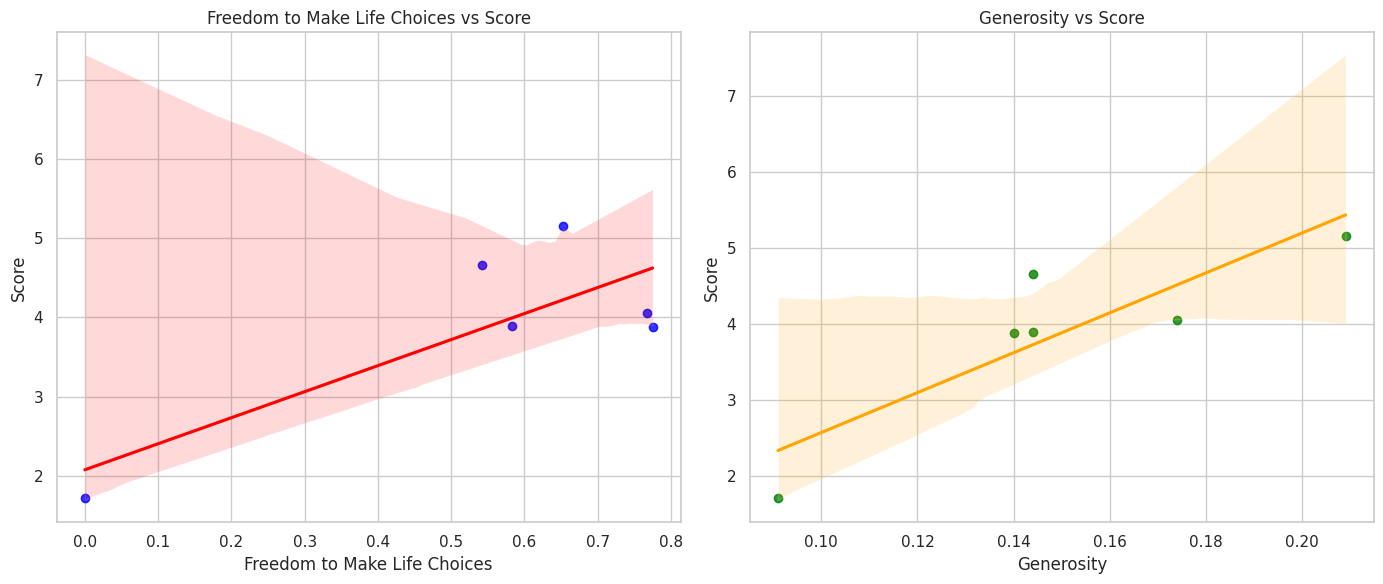

In [19]:
# Set the style
sns.set(style="whitegrid")

# Create scatter plot for Freedom to Make Life Choices vs Score
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.regplot(x='Freedom to make life choices', y='score', data=south_asian_dt, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Freedom to Make Life Choices vs Score',fontsize=12)
plt.xlabel('Freedom to Make Life Choices',fontsize=12)
plt.ylabel('Score',fontsize=12)

# Create scatter plot for Generosity vs Score
plt.subplot(1, 2, 2)
sns.regplot(x='Generosity', y='score', data=south_asian_dt, scatter_kws={'color': 'green'}, line_kws={'color': 'orange'})
plt.title('Generosity vs Score',fontsize=12)
plt.xlabel('Generosity',fontsize=12)
plt.ylabel('Score',fontsize=12)

plt.tight_layout()
plt.show()

#####Task - 5 - Gap Analysis:

In [20]:
#Calculate GDP-Score gap
south_asian_dt['GDP-Score Gap'] = south_asian_dt['score'] - south_asian_dt['Log GDP per capita']

# Rank countries by GDP-Score Gap in ascending order
south_asian_dt['Rank Ascending'] = south_asian_dt['GDP-Score Gap'].rank(ascending=True)

# Rank countries by GDP-Score Gap in descending order
south_asian_dt['Rank Descending'] = south_asian_dt['GDP-Score Gap'].rank(ascending=False)

# Get top 3 positive and negative gaps
top_positive_gaps = south_asian_dt.nlargest(3, 'GDP-Score Gap')
top_negative_gaps = south_asian_dt.nsmallest(3, 'GDP-Score Gap')

# Combine for plotting
top_gaps = pd.concat([top_positive_gaps, top_negative_gaps])

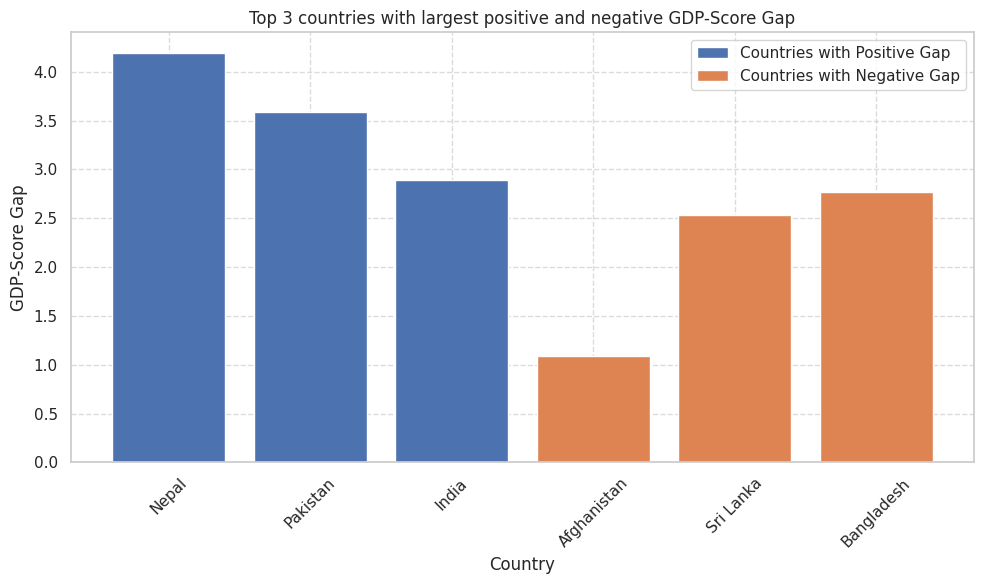

In [21]:
# Plotting the barchart
plt.figure(figsize=(10, 6))
plt.bar(top_positive_gaps["Country name"], top_positive_gaps["GDP-Score Gap"])
plt.bar(top_negative_gaps["Country name"], top_negative_gaps["GDP-Score Gap"])
plt.xlabel("Country")
plt.ylabel("GDP-Score Gap")

plt.title("Top 3 countries with largest positive and negative GDP-Score Gap")
plt.legend(["Countries with Positive Gap", "Countries with Negative Gap"])
plt.grid(linestyle="--", alpha=0.7)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
print(top_gaps[['Country name', 'GDP-Score Gap']])


  Country name  GDP-Score Gap
0        Nepal          4.193
1     Pakistan          3.588
2        India          2.888
5  Afghanistan          1.093
3    Sri Lanka          2.537
4   Bangladesh          2.764


###3.3 Problem - 3 - Comparative Analysis:

####Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:

In [23]:
#Setting up middle east countries
middle_east_countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
"United Arab Emirates", "Yemen"]

#Making them into a dataframe
middle_east_dt = dt[dt['Country name'].isin(middle_east_countries)]

#Saving them in a different csv
middle_east_dt.to_csv("/content/drive/MyDrive/Middle_East_Happiness_Report.csv",index = False)

#Printing the filtered dataset
print("Filtered Dataset:")
print(middle_east_dt.head(10))


Filtered Dataset:
             Country name  score  Log GDP per capita  Social support  \
4                  Israel  7.341               1.803           1.513   
12                 Kuwait  6.951               1.845           1.364   
21   United Arab Emirates  6.733               1.983           1.164   
27           Saudi Arabia  6.594               1.842           1.361   
61                Bahrain  5.959                 NaN             NaN   
91                   Iraq  5.166               1.249           0.996   
99                   Iran  4.923               1.435           1.136   
124                Jordan  4.186               1.262           0.983   
132                 Yemen  3.561               0.671           1.281   
141               Lebanon  2.707               1.377           0.577   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
4                      0.740                         0.641       0.153   
12                     0.661             

#####1. Descriptive Statistics:

In [24]:
#Calculating the mean and standard deviation of south-asian and middle east countries
south_asian_mean = south_asian_dt['score'].mean()
south_asian_std = south_asian_dt['score'].std()

middle_east_mean = middle_east_dt['score'].mean()
middle_east_std = middle_east_dt['score'].std()

print(f"South Asian Mean Score: {south_asian_mean}")
print(f"South Asian Standard Deviation: {south_asian_std}")
print(f"Middle East Mean Score: {middle_east_mean}")
print(f"Middle East Standard Deviation: {middle_east_std}")


South Asian Mean Score: 3.895666666666667
South Asian Standard Deviation: 1.1770690152521504
Middle East Mean Score: 5.412100000000001
Middle East Standard Deviation: 1.5662011684327144


######Based on the calculation the middle eastern region has higher happiness score of 5.42 compared to south-asia's 3.90

#####2. Top and Bottom Performers:

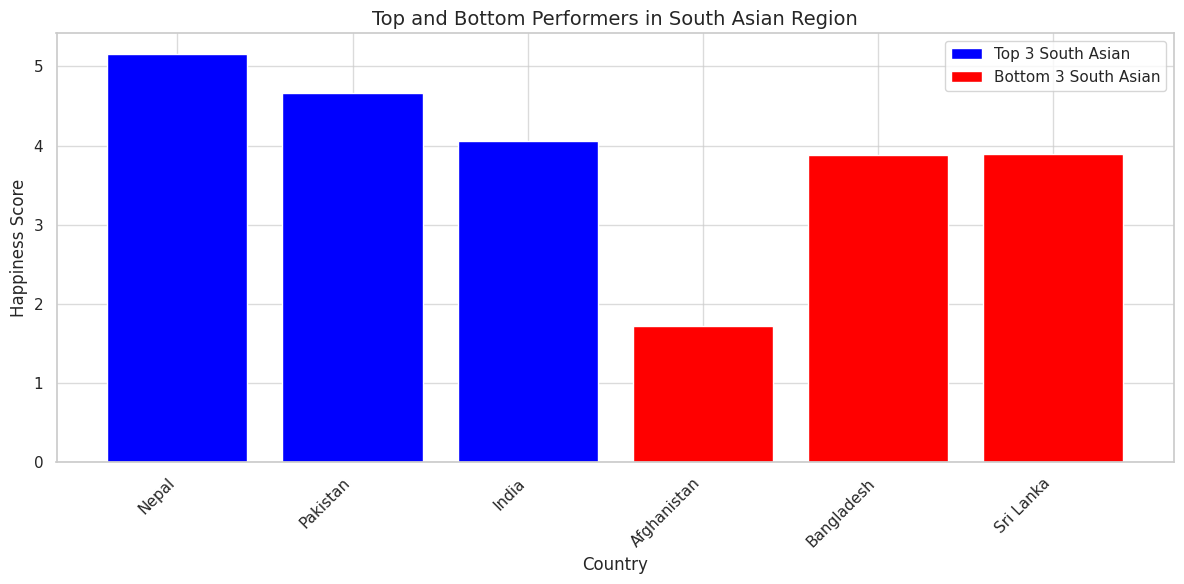

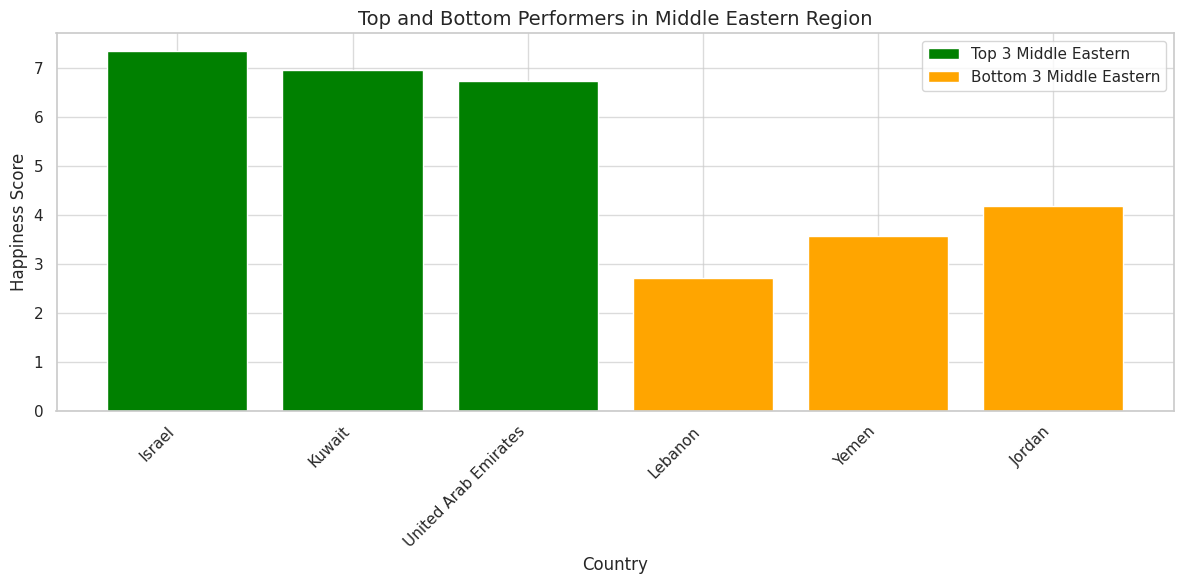

In [25]:
import matplotlib.pyplot as plt

# Data preparation
top3_south_asian = south_asian_dt.nlargest(3, 'score')
bottom3_south_asian = south_asian_dt.nsmallest(3, 'score')

top3_middle_east = middle_east_dt.nlargest(3, 'score')
bottom3_middle_east = middle_east_dt.nsmallest(3, 'score')

# Plotting for South Asia
plt.figure(figsize=(12, 6))
plt.bar(top3_south_asian['Country name'], top3_south_asian['score'], color='blue', label='Top 3 South Asian')
plt.bar(bottom3_south_asian['Country name'], bottom3_south_asian['score'], color='red', label='Bottom 3 South Asian')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.title('Top and Bottom Performers in South Asian Region', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()
print()

# Plotting for Middle East
plt.figure(figsize=(12, 6))
plt.bar(top3_middle_east['Country name'], top3_middle_east['score'], color='green', label='Top 3 Middle Eastern')
plt.bar(bottom3_middle_east['Country name'], bottom3_middle_east['score'], color='orange', label='Bottom 3 Middle Eastern')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.title('Top and Bottom Performers in Middle Eastern Region', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


#####3. Metric Comparisons:

<Figure size 1200x600 with 0 Axes>

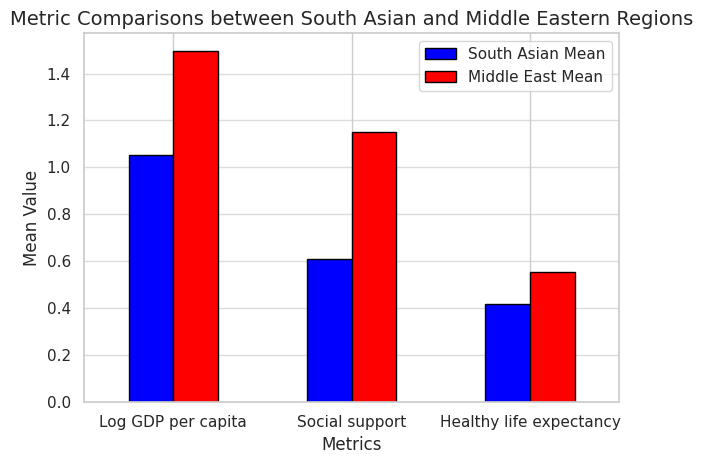

In [26]:
#Metric comparison based on gdp per capita,social support and health expectency
metrics_to_compare = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
south_asian_mean = south_asian_dt[metrics_to_compare].mean()
middle_east_mean = middle_east_dt[metrics_to_compare].mean()

#Creating dataframe for comparison
comparison_df = pd.DataFrame({'South Asian Mean': south_asian_mean, 'Middle East Mean': middle_east_mean})

#Plotting a bar chart comparing the means
plt.figure(figsize=(12, 6))
comparison_df.plot(kind='bar', color =['blue','red'], edgecolor ='black')
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Mean Value', fontsize=12)
plt.title('Metric Comparisons between South Asian and Middle Eastern Regions', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y',alpha=0.7)
plt.tight_layout()
plt.show()

#####From the chart, the largest disparities between the two regions are observed in the following metrics:

Log GDP per capita: The Middle Eastern region shows a significantly higher mean value compared to the South Asian region.

Social support: Again, the Middle Eastern region has a much higher mean compared to South Asia.

The disparity in Healthy life expectancy is less pronounced but still present, with the Middle East having a slight advantage.

#####4. Happiness Disparity:

In [27]:
# South Asian Region Calculations
south_asian_max = south_asian_dt['score'].max()
south_asian_min = south_asian_dt['score'].min()
south_asian_variance = south_asian_dt['score'].var()
south_asian_std_dev = south_asian_dt['score'].std()

# Middle Eastern Region Calculations
middle_east_max = middle_east_dt['score'].max()
middle_east_min = middle_east_dt['score'].min()
middle_east_variance = middle_east_dt['score'].var()
middle_east_std_dev = middle_east_dt['score'].std()

# Output the results
print(f"South Asian Region:")
print(f"Max Score: {south_asian_max}")
print(f"Min Score: {south_asian_min}")
print(f"Variance of Score: {south_asian_variance}")
print(f"Standard Deviation of Score: {south_asian_std_dev}")
print()

print(f"Middle Eastern Region:")
print(f"Max Score: {middle_east_max}")
print(f"Min Score: {middle_east_min}")
print(f"Variance of Score: {middle_east_variance}")
print(f"Standard Deviation of Score: {middle_east_std_dev}")


South Asian Region:
Max Score: 5.158
Min Score: 1.721
Variance of Score: 1.385491466666667
Standard Deviation of Score: 1.1770690152521504

Middle Eastern Region:
Max Score: 7.341
Min Score: 2.707
Variance of Score: 2.4529861
Standard Deviation of Score: 1.5662011684327144


Variance and standard deviation are higher for the Middle Eastern Region, indicating that happiness scores in this region are more spread out or variable compared to the South Asian Region. In conclusion, Middle East has greater variability in happiness.

#####5. Correlation Analysis:

South Asian Region Correlation Analysis:
Correlation between Freedom to Make Life Choices and Score: 0.80
Correlation between Generosity and Score: 0.87


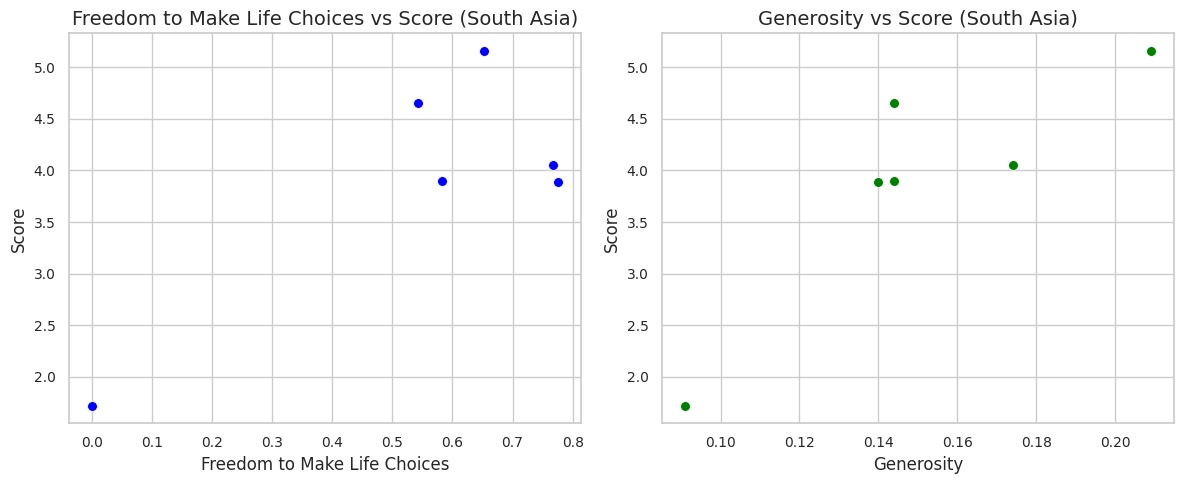


Middle Eastern Region Correlation Analysis:
Correlation between Freedom to Make Life Choices and Score: 0.86
Correlation between Generosity and Score: 0.63


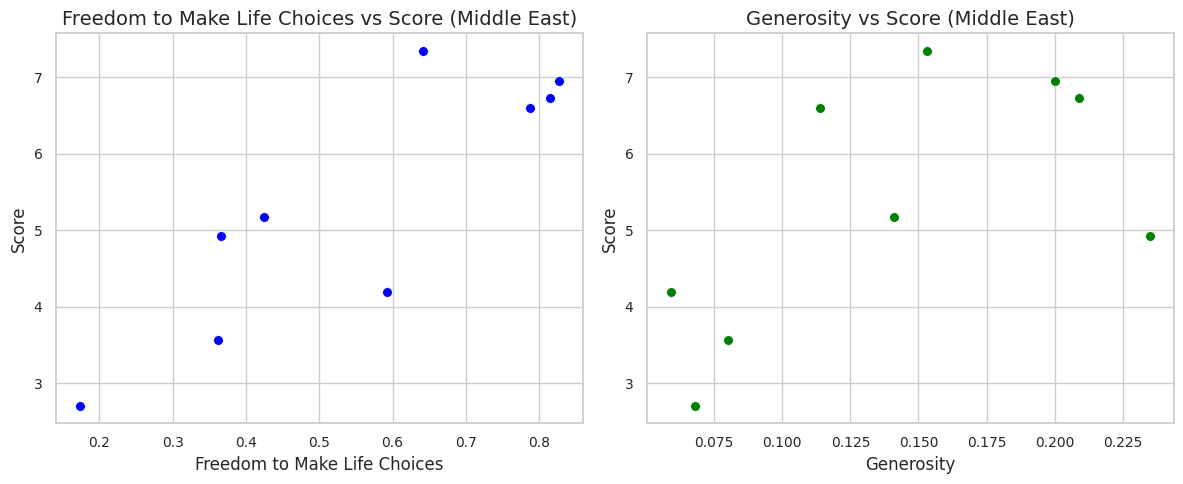

In [28]:
# South Asian Region Calculations
south_freedom_correlation = south_asian_dt['Freedom to make life choices'].corr(south_asian_dt['score'])
south_generosity_correlation = south_asian_dt['Generosity'].corr(south_asian_dt['score'])

print("South Asian Region Correlation Analysis:")
print(f"Correlation between Freedom to Make Life Choices and Score: {south_freedom_correlation:.2f}")
print(f"Correlation between Generosity and Score: {south_generosity_correlation:.2f}")

# Scatter plots for South Asian Region
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=south_asian_dt, x='Freedom to make life choices', y='score', s=50, color='blue')
plt.title('Freedom to Make Life Choices vs Score (South Asia)', fontsize=14)
plt.xlabel('Freedom to Make Life Choices', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.tick_params(axis='both', labelsize=10)

plt.subplot(1, 2, 2)
sns.scatterplot(data=south_asian_dt, x='Generosity', y='score', s=50, color='green')
plt.title('Generosity vs Score (South Asia)', fontsize=14)
plt.xlabel('Generosity', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.tick_params(axis='both', labelsize=10)

plt.tight_layout()
plt.show()

# Middle Eastern Region Calculations
middle_east_freedom_correlation = middle_east_dt['Freedom to make life choices'].corr(middle_east_dt['score'])
middle_east_generosity_correlation = middle_east_dt['Generosity'].corr(middle_east_dt['score'])

print("\nMiddle Eastern Region Correlation Analysis:")
print(f"Correlation between Freedom to Make Life Choices and Score: {middle_east_freedom_correlation:.2f}")
print(f"Correlation between Generosity and Score: {middle_east_generosity_correlation:.2f}")

# Scatter plots for Middle Eastern Region
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=middle_east_dt, x='Freedom to make life choices', y='score', s=50, color='blue')
plt.title('Freedom to Make Life Choices vs Score (Middle East)', fontsize=14)
plt.xlabel('Freedom to Make Life Choices', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.tick_params(axis='both', labelsize=10)

plt.subplot(1, 2, 2)
sns.scatterplot(data=middle_east_dt, x='Generosity', y='score', s=50, color='green')
plt.title('Generosity vs Score (Middle East)', fontsize=14)
plt.xlabel('Generosity', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.tick_params(axis='both', labelsize=10)

plt.tight_layout()
plt.show()


In the plot, we can see that the Middle East performs consistently better on all three metrics which shows that the region has an advantage on all three metrics and South Asia has areas for improvement in all three metrics.

#####6. Outlier Detection:

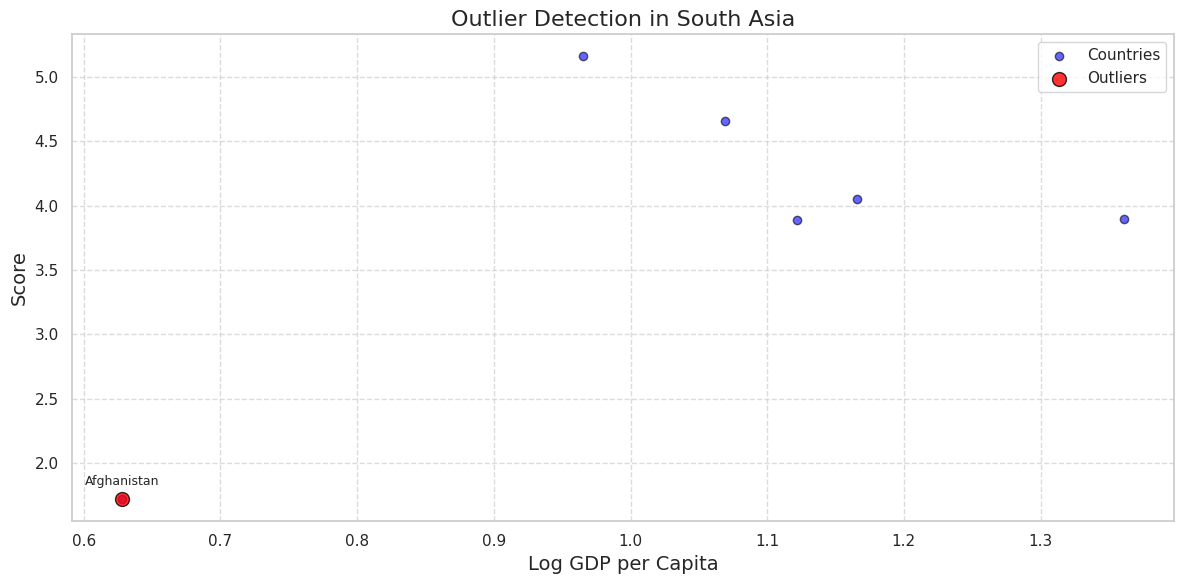

In [29]:
#Calculating outliers
# Calculate Q1, Q3, and IQR for Composite Score and GDP per Capita
def calculate_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    return Q1, Q3, IQR

# Calculate IQR for Composite Score
Q1_score, Q3_score, IQR_score = calculate_iqr(south_asian_dt, 'score')

# Calculate IQR for GDP per Capita
Q1_gdp, Q3_gdp, IQR_gdp = calculate_iqr(south_asian_dt, 'Log GDP per capita')

# Define outlier bounds
lower_bound_score = Q1_score - 1.5 * IQR_score
upper_bound_score = Q3_score + 1.5 * IQR_score

lower_bound_gdp = Q1_gdp - 1.5 * IQR_gdp
upper_bound_gdp = Q3_gdp + 1.5 * IQR_gdp

# Identify outliers
outliers = south_asian_dt[(south_asian_dt['score'] < lower_bound_score) |
                           (south_asian_dt['score'] > upper_bound_score) |
                           (south_asian_dt['Log GDP per capita'] < lower_bound_gdp) |
                           (south_asian_dt['Log GDP per capita'] > upper_bound_gdp)]

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(south_asian_dt['Log GDP per capita'], south_asian_dt['score'],
            label='Countries', color='blue', alpha=0.6, edgecolor='black')

# Highlight outliers
plt.scatter(outliers['Log GDP per capita'], outliers['score'],
            label='Outliers', color='red', s=100, edgecolor='black', alpha=0.8)

# Annotate outliers with country names
for i, row in outliers.iterrows():
    plt.annotate(row['Country name'], (row['Log GDP per capita'], row['score']),
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)

plt.grid(True, linestyle='--', alpha=0.7)

# Add labels and title
plt.xlabel('Log GDP per Capita', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Outlier Detection in South Asia', fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

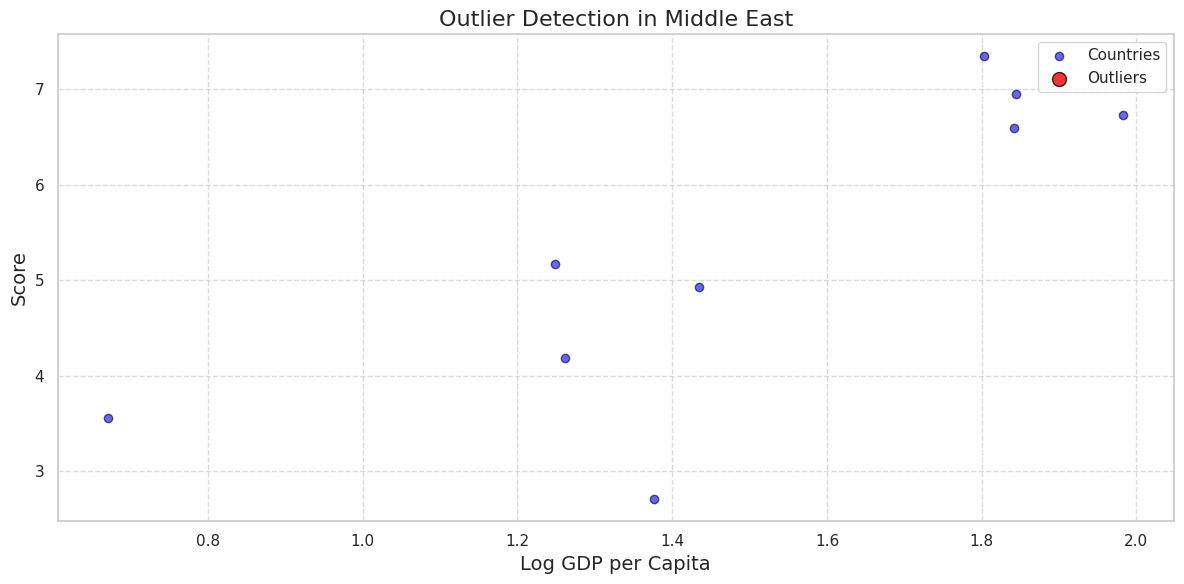

In [30]:
# Calculate IQR for Composite Score (Middle East Region)
Q1_score_me, Q3_score_me, IQR_score_me = calculate_iqr(middle_east_dt, 'score')

# Calculate IQR for GDP per Capita (Middle East Region)
Q1_gdp_me, Q3_gdp_me, IQR_gdp_me = calculate_iqr(middle_east_dt, 'Log GDP per capita')

# Define outlier bounds for Middle East
lower_bound_score_me = Q1_score_me - 1.5 * IQR_score_me
upper_bound_score_me = Q3_score_me + 1.5 * IQR_score_me

lower_bound_gdp_me = Q1_gdp_me - 1.5 * IQR_gdp_me
upper_bound_gdp_me = Q3_gdp_me + 1.5 * IQR_gdp_me

# Identify outliers for Middle East
outliers_me = middle_east_dt[(middle_east_dt['score'] < lower_bound_score_me) |
                             (middle_east_dt['score'] > upper_bound_score_me) |
                             (middle_east_dt['Log GDP per capita'] < lower_bound_gdp_me) |
                             (middle_east_dt['Log GDP per capita'] > upper_bound_gdp_me)]

# Create a scatter plot for Middle Eastern countries
plt.figure(figsize=(12, 6))
plt.scatter(middle_east_dt['Log GDP per capita'], middle_east_dt['score'],
            label='Countries', color='blue', alpha=0.6, edgecolor='black')

# Highlight outliers
plt.scatter(outliers_me['Log GDP per capita'], outliers_me['score'],
            label='Outliers', color='red', s=100, edgecolor='black', alpha=0.8)

# Annotate outliers with country names
for i, row in outliers_me.iterrows():
    plt.annotate(row['Country name'], (row['Log GDP per capita'], row['score']),
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)

plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Log GDP per Capita', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Outlier Detection in Middle East', fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

#####7. Visualization:

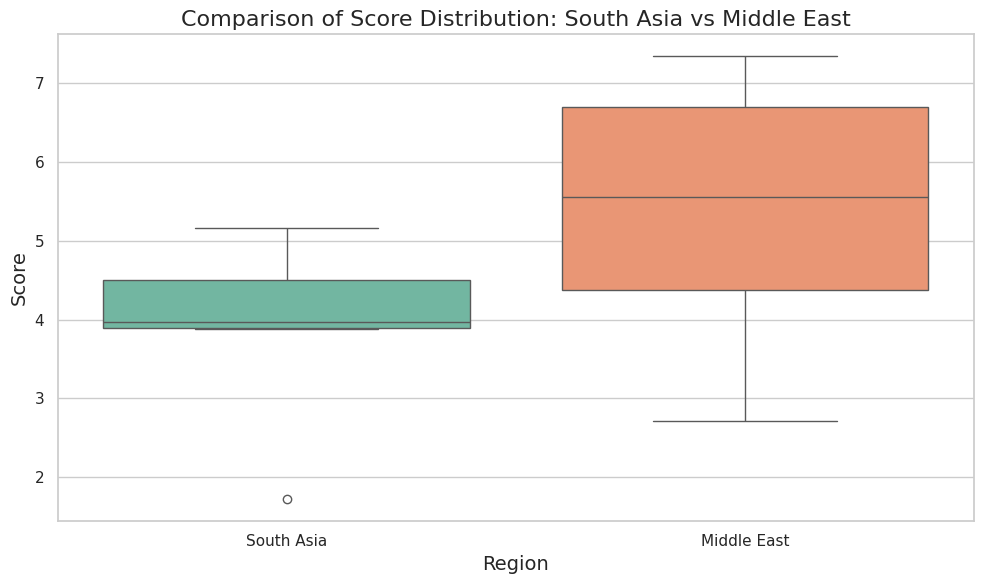

In [32]:
# Add a new column 'Region' to differentiate between South Asia and Middle East
south_asian_dt.loc[:, 'Region'] = 'South Asia'
middle_east_dt.loc[:, 'Region'] = 'Middle East'

# Combine both dataframes
combined_dt = pd.concat([south_asian_dt[['score', 'Region']], middle_east_dt[['score', 'Region']]])

# Create a boxplot comparing the distribution of scores between South Asia and Middle East
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_dt, x='Region', y='score', hue='Region', palette='Set2', showfliers=True)

# Add title and labels
plt.title('Comparison of Score Distribution: South Asia vs Middle East', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Score', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()
